In [2]:
import sys
import os
import gsd.hoomd
path = "/Volumes/ALI/postdoc_project/active_nematics_defect/workspace/8c9bf534ce845303a1fb6c3ebedbbeb5"
import numpy as np

In [3]:
sys.path.append("./utils")
import util

In [9]:
from importlib import reload
reload(util)

<module 'util' from './utils/util.py'>

In [8]:
#import gsd.hoomd
#s = gsd.hoomd.open(name = os.path.join(path, "trajectory.gsd"), mode="rb")
#s = gsd.hoomd.open(name="test_data/new_small_file.gsd", mode="wb")
#t = gsd.hoomd.open(name=os.path.join(path,"trajectory.gsd"), mode="rb")

#s.extend(t[500:-1])
#s = gsd.hoomd.open(name="new_small_file.gsd", mode="rb")

In [4]:
s = gsd.hoomd.open(name="../test_data/new_small_file.gsd", mode="rb")

In [5]:
len(s)

76

In [10]:

sys.path.append("/Volumes/ALI/Postdoc_Project/data_analysis/freud")
import freud

snap = s[-1]
box = freud.box.Box.from_box(snap.configuration.box, dimensions=2)


cell_size = 3
r_nlist = 4
p_per_cell = 10
r_cl = 3
min_angle = 70./180.*np.pi
slice_no = 8

neigh_density = 1.
neigh_area = np.pi*(r_nlist**2)
count = int(neigh_density * neigh_area)

defect = util.defect(snap, cell_size, r_cl, slice_no,min_angle)

/Users/ali/anaconda3/envs/xtensor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Specifying z-dimensions in a 2-dimensional box has no effect!
  


In [16]:
from tqdm import tqdm_notebook as tqdm
folder_name = "slice_no_{}".format(slice_no)
data_folder = os.path.join("../test_data", folder_name)
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
import numpy as np
from xyz import *
for i in tqdm(range(len(s))):
    snap = s[i]
    tags_p, tags_m = defect.snap_find_tags(snap, r_nlist, p_per_cell, count)
    fname_p = "defect_p_{}.xyz".format(i)
    fname_m = "defect_m_{}.xyz".format(i)
    write_xyz(open(os.path.join(data_folder,fname_p),"w"),defect.defect_position(snap,tags_p, 3), "P")
    write_xyz(open(os.path.join(data_folder,fname_m),"w"),defect.defect_position(snap,tags_m, 3), "M")

In [17]:
import sys
sys.path.append("utils/")
from track import *
from xyz import *
import os
import glob
path_folder = "../test_data/slice_no_8"

snap_No = int(len(glob.glob(os.path.join(path_folder,"*.xyz")))/2)
snap_No

frames_p = []
frames_m = []

for i in range(snap_No):
    xyz = read_xyz(open("../test_data/slice_no_10/defect_p_{}.xyz".format(i),"r"))
    frames_p.append(snap_to_trackpy(xyz.coords, i))
    xyz = read_xyz(open("../test_data/slice_no_10/defect_m_{}.xyz".format(i),"r"))
    frames_m.append(snap_to_trackpy(xyz.coords, i))

In [18]:
frames_m[0].head()

,x,y,frame
0,6.359283,-115.703041,0
1,120.772675,-74.168396,0
2,-99.359711,-48.586990,0
3,-102.239799,-36.809769,0
4,-97.163177,-34.064583,0


In [19]:
import trackpy
import pandas
tr_p = pandas.concat(trackpy.link_df_iter(frames_p, 5))
tr_m = pandas.concat(trackpy.link_df_iter(frames_m, 5))

Frame 75: 39 trajectories present.


(-134.71347007751464,
 134.6759105682373,
 -134.70692443847656,
 134.64402770996094)

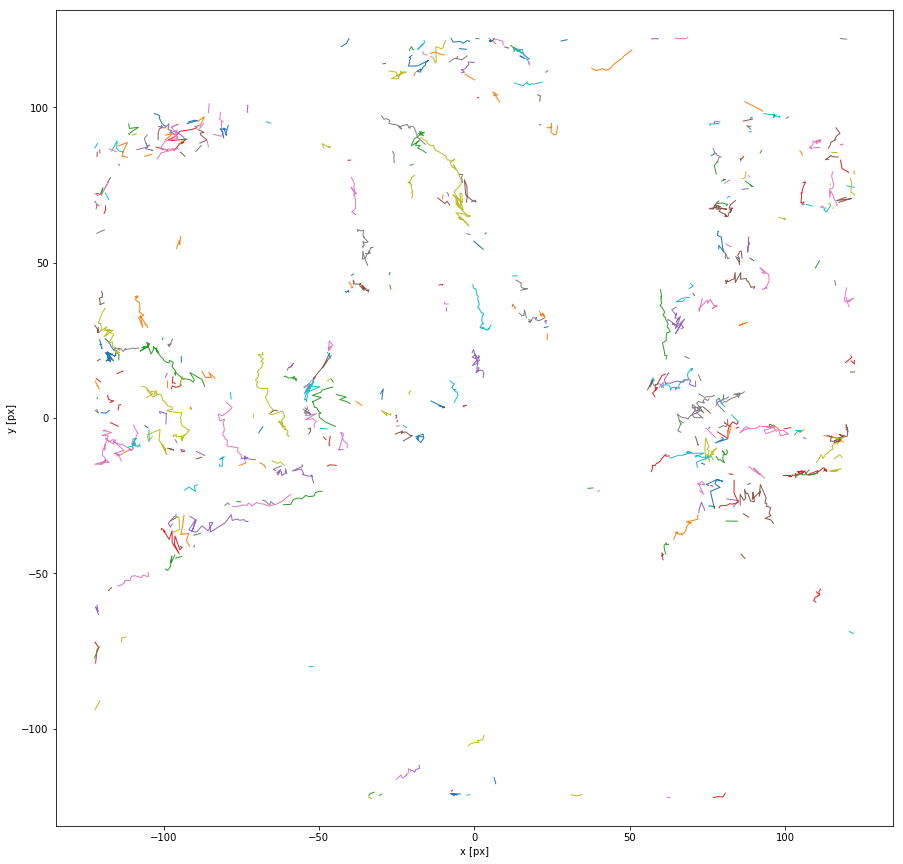

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(15,15))
trackpy.plot_traj(tr_m, ax=ax)
ax.set_ylim([-100,100])
ax.axis('equal')